In [2]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape,x_test.shape #This are the input features

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape,y_test.shape #This are the output lables.

((60000,), (10000,))

In [6]:
x_valid,x_train = (x_train[:5000]/255.),(x_train[5000:]/255.) # here we are deviding the trainig data by 255 bcoz evry image is of 255 pixels and to normalize every pixel we are dividing by 255.
y_valid,y_train = (y_train[:5000]),(y_train[5000:]) # its the label data so dont need to normalize it.

In [7]:
x_train.shape,x_valid.shape 

((55000, 28, 28), (5000, 28, 28))

In [8]:
y_train.shape,y_valid.shape

((55000,), (5000,))

In [9]:
x_test = x_test/255.

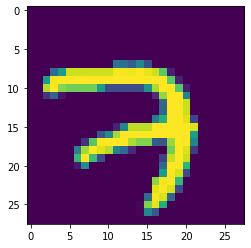

***********************************


7

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) #its showing what the image is represesnting.
plt.show()

print("*"*35)
y_train[0] #its showing what the lable is.

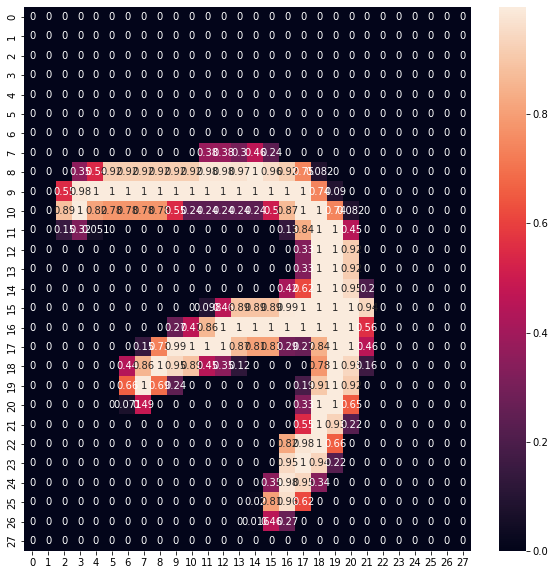

In [11]:
#lets draw a hitmap too see image presentation
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(x_train[0],annot=True)
plt.show()

In [12]:
''' now in the above image its shown that every datapoint is of 28 * 28 pixels of size i.e 
    it is in 2D array form,so before apply it to model we need to make it 1D form,for that we going to appply flattening.'''
  
LAYERS = [tf.keras.layers.Flatten(input_shape=(28,28),name="Flattening"),
          tf.keras.layers.Dense(300,activation="relu",name="hidden_layer1"),
           tf.keras.layers.Dense(100,activation="relu",name="hidden_layer2"),
            tf.keras.layers.Dense(10,activation="softmax",name="output_layer1")
]


In [13]:
model = tf.keras.models.Sequential(LAYERS)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flattening (Flatten)         (None, 784)               0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 300)               235500    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 100)               30100     
_________________________________________________________________
output_layer1 (Dense)        (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
'''
lets see how to calculate trainable parameter?
in the first input layers there is no paramter coz obviously there are no weights.
in the second layer there are 300 weights and 784 input points  and 300 biases which is equal to 784*300+300 = 235500
in the third layer there are 100 weights and 300 input points  and 300 biases which is equal to 300*100+100 = 30100
in the output layer there are 10 weights and 100 input points  and 10 biases which is equal to 100*10+10 = 1010
'''


'\nlets see how to calculate trainable parameter?\nin the first input layers there is no paramter coz obviously there are no weights.\nin the second layer there are 300 weights and 784 input points  and 300 biases which is equal to 784*300+300 = 235500\nin the third layer there are 100 weights and 300 input points  and 300 biases which is equal to 300*100+100 = 30100\nin the output layer there are 10 weights and 100 input points  and 10 biases which is equal to 100*10+10 = 1010\n'

In [16]:
LOSS = 'sparse_categorical_crossentropy'
OPTIMIZER = "SGD"
METRICS = ["accuracy"]
model.compile(loss=LOSS,optimizer=OPTIMIZER,metrics=METRICS)

In [17]:
'''
epochs = how many times your model shoud go through all the training dataset.
batch_size = how many data you want to pass in one go
'''
BATCH = 32
EPOCH = 10
VALIDATION_SET = (x_valid,y_valid)
HISTORY = model.fit(x_train,y_train,epochs=EPOCH,validation_data=VALIDATION_SET)

# the weights updation is dependent on batch_size in our case it is 32, so training_data/32 which is 55000/32=1719.

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6292 - accuracy: 0.8408 - val_loss: 0.3048 - val_accuracy: 0.9154
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2866 - accuracy: 0.9172 - val_loss: 0.2380 - val_accuracy: 0.9342
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2326 - accuracy: 0.9332 - val_loss: 0.1971 - val_accuracy: 0.9438
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1983 - accuracy: 0.9431 - val_loss: 0.1749 - val_accuracy: 0.9510
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1723 - accuracy: 0.9504 - val_loss: 0.1554 - val_accuracy: 0.9564
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1530 - accuracy: 0.9565 - val_loss: 0.1433 - val_accuracy: 0.9614
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1376 - accuracy: 0.9607 - val_loss: 0.1293 - val_accuracy:

In [18]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1125 - accuracy: 0.9677: 0s - loss: 0.1504 - 


[0.11246534436941147, 0.9677000045776367]

In [19]:
model.save("Model.h5") # h5 is the extension to save keras models

In [20]:
HISTORY

In [21]:
HISTORY = HISTORY.history # This returns the dictioanry of information related to accuracy,loss of model.

In [22]:
# lets visualize the performance of model
import pandas as pd
data  = pd.DataFrame(HISTORY)
data

,loss,accuracy,val_loss,val_accuracy
0,0.629208,0.840764,0.304811,0.9154
1,0.286615,0.917236,0.237977,0.9342
2,0.232580,0.933164,0.197115,0.9438
3,0.198263,0.943091,0.174918,0.9510
4,0.172338,0.950382,0.155398,0.9564
5,0.152990,0.956545,0.143345,0.9614
6,0.137628,0.960691,0.129250,0.9654
7,0.124600,0.964527,0.120430,0.9674
8,0.113297,0.967491,0.114068,0.9698
9,0.104208,0.970018,0.108800,0.9702


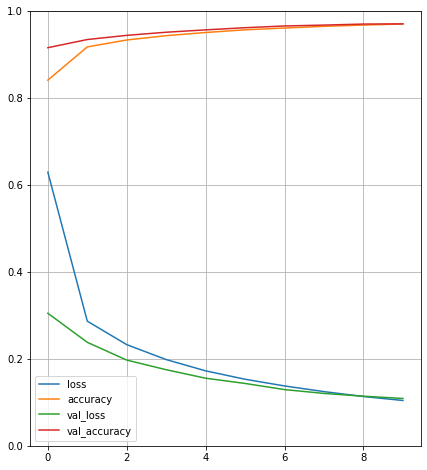

In [23]:
data.plot(figsize=(7,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [24]:
# lets see how to import and evaluate model again on test data
model = tf.keras.models.load_model("Model.h5")

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1125 - accuracy: 0.9677


[0.11246534436941147, 0.9677000045776367]

In [26]:
x_new = x_test[:3]
y_new = y_test[:3]
pred = model.predict(x_new) # this will give array of probability of evry digit of what model predicted.
pred

array([[5.4086489e-05, 7.5270458e-07, 4.0546380e-04, 1.6677313e-03,
        1.5978377e-07, 4.6927475e-05, 3.4010696e-09, 9.9773872e-01,
        1.0072815e-05, 7.6033852e-05],
       [1.0623094e-04, 6.2057399e-05, 9.9347681e-01, 6.0803005e-03,
        9.2133821e-11, 1.4988052e-04, 5.6968904e-05, 2.2976241e-09,
        6.7799643e-05, 2.0409070e-10],
       [3.3965855e-05, 9.9006528e-01, 1.8393043e-03, 9.2026760e-04,
        5.3708075e-04, 6.9096766e-04, 5.4772175e-04, 4.1094241e-03,
        1.1099117e-03, 1.4623105e-04]], dtype=float32)

In [27]:
# lets round the probabilities so that we can get a better idea what model is predicted
pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [28]:
import numpy as np
y_pred = np.argmax(pred,axis=-1)
y_pred

array([7, 2, 1], dtype=int64)

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


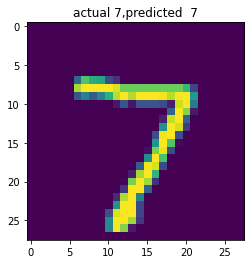

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


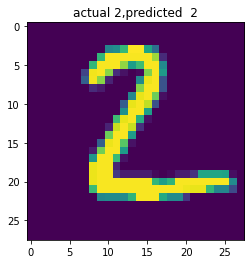

-+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+--+-


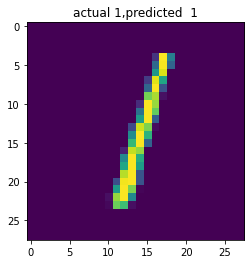

In [29]:
# lets visualise the prediction,actual value.

for data,pred,actual in zip(x_new,y_pred,y_new):
  plt.imshow(data)
  plt.title(f"actual {actual},predicted  {pred}")
  print("-+-" * 20)
  plt.show()